# Concrete Compressive Strength Determination using Hyperparameter Tuning

## Data Description

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory.Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. this is the most important measure of the quality of concreate and modeling this enables civil engineers to make concreate stronger and cheaper.

Given below are the features and target of the dataset for the analysis

- **Cement (kg/m3)** : This is just the portland cement which is used for the mixture. Cement is manufactured through a closely controlled chemical combination of calcium, silicon, aluminum, iron and other ingredients.
- **Blast (slag)(kg/m3)**: produced during the reduction of iron ore to iron in a blast furnace. Molten slag is tapped from a blast furnace, rapidly quenched with water ("granulated"), dried and ground to a fine powder. Slag cement is a hydraulic binder that, like portland cement, reacts with water to form cementitious material (calcium-silicate hydrate or CSH). It also, similar to a pozzolan, consumes by-product calcium hydroxide from the hydration of portland cement to form additional CSH. The resulting cement paste is stronger and denser, thus improving the concrete.
- **Fly ash (kg/m3)**: Fly ash is the finely divided residue that results from the combustion of pulverized coal and is transported from the combustion chamber by exhaust gases. Over 61 million metric tons (68 million tons) of fly ash were produced in 2001. Fly ash use in concrete improves the workability of plastic concrete, and the strength and durability of hardened concrete. Fly ash use is also cost effective. When fly ash is added to concrete, the amount of portland cement may be reduced.
- **Water (kg/m3)**: water is an important component of making concreate. the ratio of water to cement improves the compressive strength. lower the ratio the stronger the concreate.
- **Superplasticizer (superplastic) (kg/m3)**: also known as high range water reducers, are additives used in making high strength concrete. Plasticers are chemical compounds that enable the production of concrete with ca. 15% less water content. Superplasticers allow reduction in water content by 30% or more. These additives are employed at the level of a few weight percent. Plasticizers and superplasticizers retard the curing of concrete
- **Coarse Aggregate (coarseagg) (kg/m3)**: Coarse aggregates are any particles greater than 0.19 inch, but generally range between 3/8 and 1.5 inches in diameter. Gravels constitute the majority of coarse aggregate used in concrete with crushed stone making up most of the remainder.
- **Fine Aggregate (fineagg) (kg/m3)**: Fine aggregate is the essential ingredient in concrete that consists of natural sand or crushed stone. The quality and fine aggregate density strongly influence the hardened properties of the concrete.
- **Age (days)(1~365)**: the strength increases with the passage of time, of course proper curing has to be done for the stipulated period i.e. at least for 7 days. 12 months the strength can go as high as 155 percent
- **Concrete compressive strength (strength) (MPa)**: Compressive strength of concrete depends on many factors such as water-cement ratio, cement strength, quality of concrete material, quality control during production of concrete etc. Test for compressive strength is carried out either on cube or cylinder. Various standard codes recommends concrete cylinder or concrete cube as the standard specimen for the test

In [1]:
# Utilities
from time import time
import itertools
import warnings


# Numerical calculation
import numpy as np
from scipy.stats import zscore

# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample and parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Predictive Modeling
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

# Feature Engineering
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# Evaluation metrics
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline

# Model Metrics functions
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

random_state = 42
np.random.seed(random_state)

In [2]:
# Configure for any default setting of any library
warnings.filterwarnings('ignore')
%matplotlib inline
# sns.set(style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df=pd.read_csv("D:\\PGP AIML\\008_HyperParameter_Tuning\\concrete (1).csv")

In [4]:
df.head()

cement    slag     ash   water  superplastic  coarseagg  fineagg  age  \
0 141.300 212.000   0.000 203.500         0.000    971.800  748.500   28   
1 168.900  42.200 124.300 158.300        10.800   1080.800  796.200   14   
2 250.000   0.000  95.700 187.400         5.500    956.900  861.200   28   
3 266.000 114.000   0.000 228.000         0.000    932.000  670.000   28   
4 154.800 183.400   0.000 193.300         9.100   1047.400  696.700   28   

   strength  
0    29.890  
1    23.510  
2    29.220  
3    45.850  
4    18.290

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.shape

(1030, 9)

## Explanatory Data Analysis

In [7]:
df.describe().T

count    mean     std     min     25%     50%      75%  \
cement       1030.000 281.168 104.506 102.000 192.375 272.900  350.000   
slag         1030.000  73.896  86.279   0.000   0.000  22.000  142.950   
ash          1030.000  54.188  63.997   0.000   0.000   0.000  118.300   
water        1030.000 181.567  21.354 121.800 164.900 185.000  192.000   
superplastic 1030.000   6.205   5.974   0.000   0.000   6.400   10.200   
coarseagg    1030.000 972.919  77.754 801.000 932.000 968.000 1029.400   
fineagg      1030.000 773.580  80.176 594.000 730.950 779.500  824.000   
age          1030.000  45.662  63.170   1.000   7.000  28.000   56.000   
strength     1030.000  35.818  16.706   2.330  23.710  34.445   46.135   

                  max  
cement        540.000  
slag          359.400  
ash           200.100  
water         247.000  
superplastic   32.200  
coarseagg    1145.000  
fineagg       992.600  
age           365.000  
strength       82.600

In [8]:
# Checking missing values in dataframe
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Univariate & Bivariate Analysis

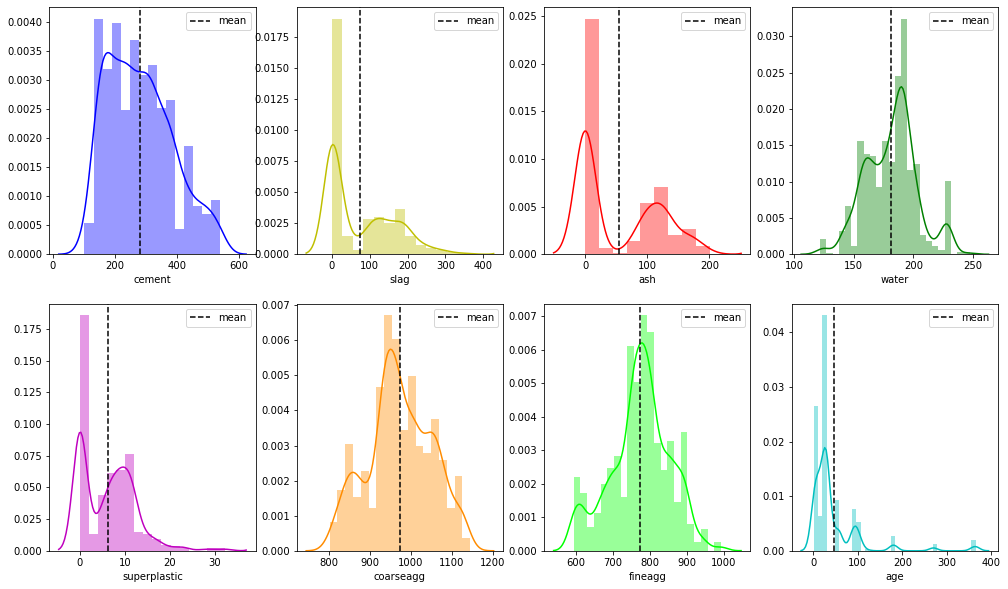

In [9]:
# Analyze the body of the distributions
cols = [i for i in df.columns if i not in 'strength']
fig = plt.figure(figsize=(17,10))
for i,j,k in itertools.zip_longest(cols, range(len(cols)), ["b","y","r","g","m","darkorange","lime","c"]):
    plt.subplot(2,4,j+1)
    ax = sns.distplot(df[i],color=k)
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")

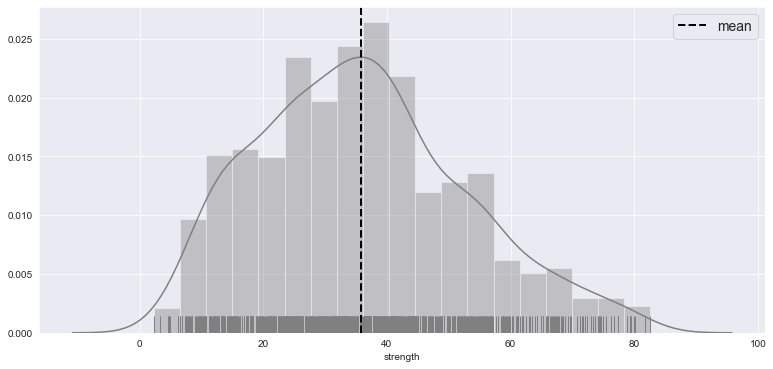

In [10]:
# Target feature "Comprehensive Strength" distribution
plt.figure(figsize=(13,6))
sns.set_style('darkgrid', {'axes.grid' : True})
sns.distplot(df["strength"],color="grey",rug=True)
plt.axvline(df["strength"].mean(), linestyle="dashed", color="k", label='mean', linewidth=2)
plt.legend(loc="best",prop={"size":14})

### Observations:

- The distribution of cement feature seems to be near normal. Rest all features posses skewed observation.
- There are clearly 2 humps visible in slag, ash and superplastic features which has a higher density at 0. So these features must be having high 0s count. Hence our dataset is a mix of multiple clusters wrt to these 3 features.
- Presence of long tails in slag, water, superplastic, fineagg and age indicates presence of outlier data point.
- Data distribution of target column seems to be close to normal distribution.
- Slight elongated tail for strength column indicates the presence of outlier.
- Most of the features have mix of gaussians because of which there are specific clusters for the strengths. its better to form clusters while modeling the strengths.

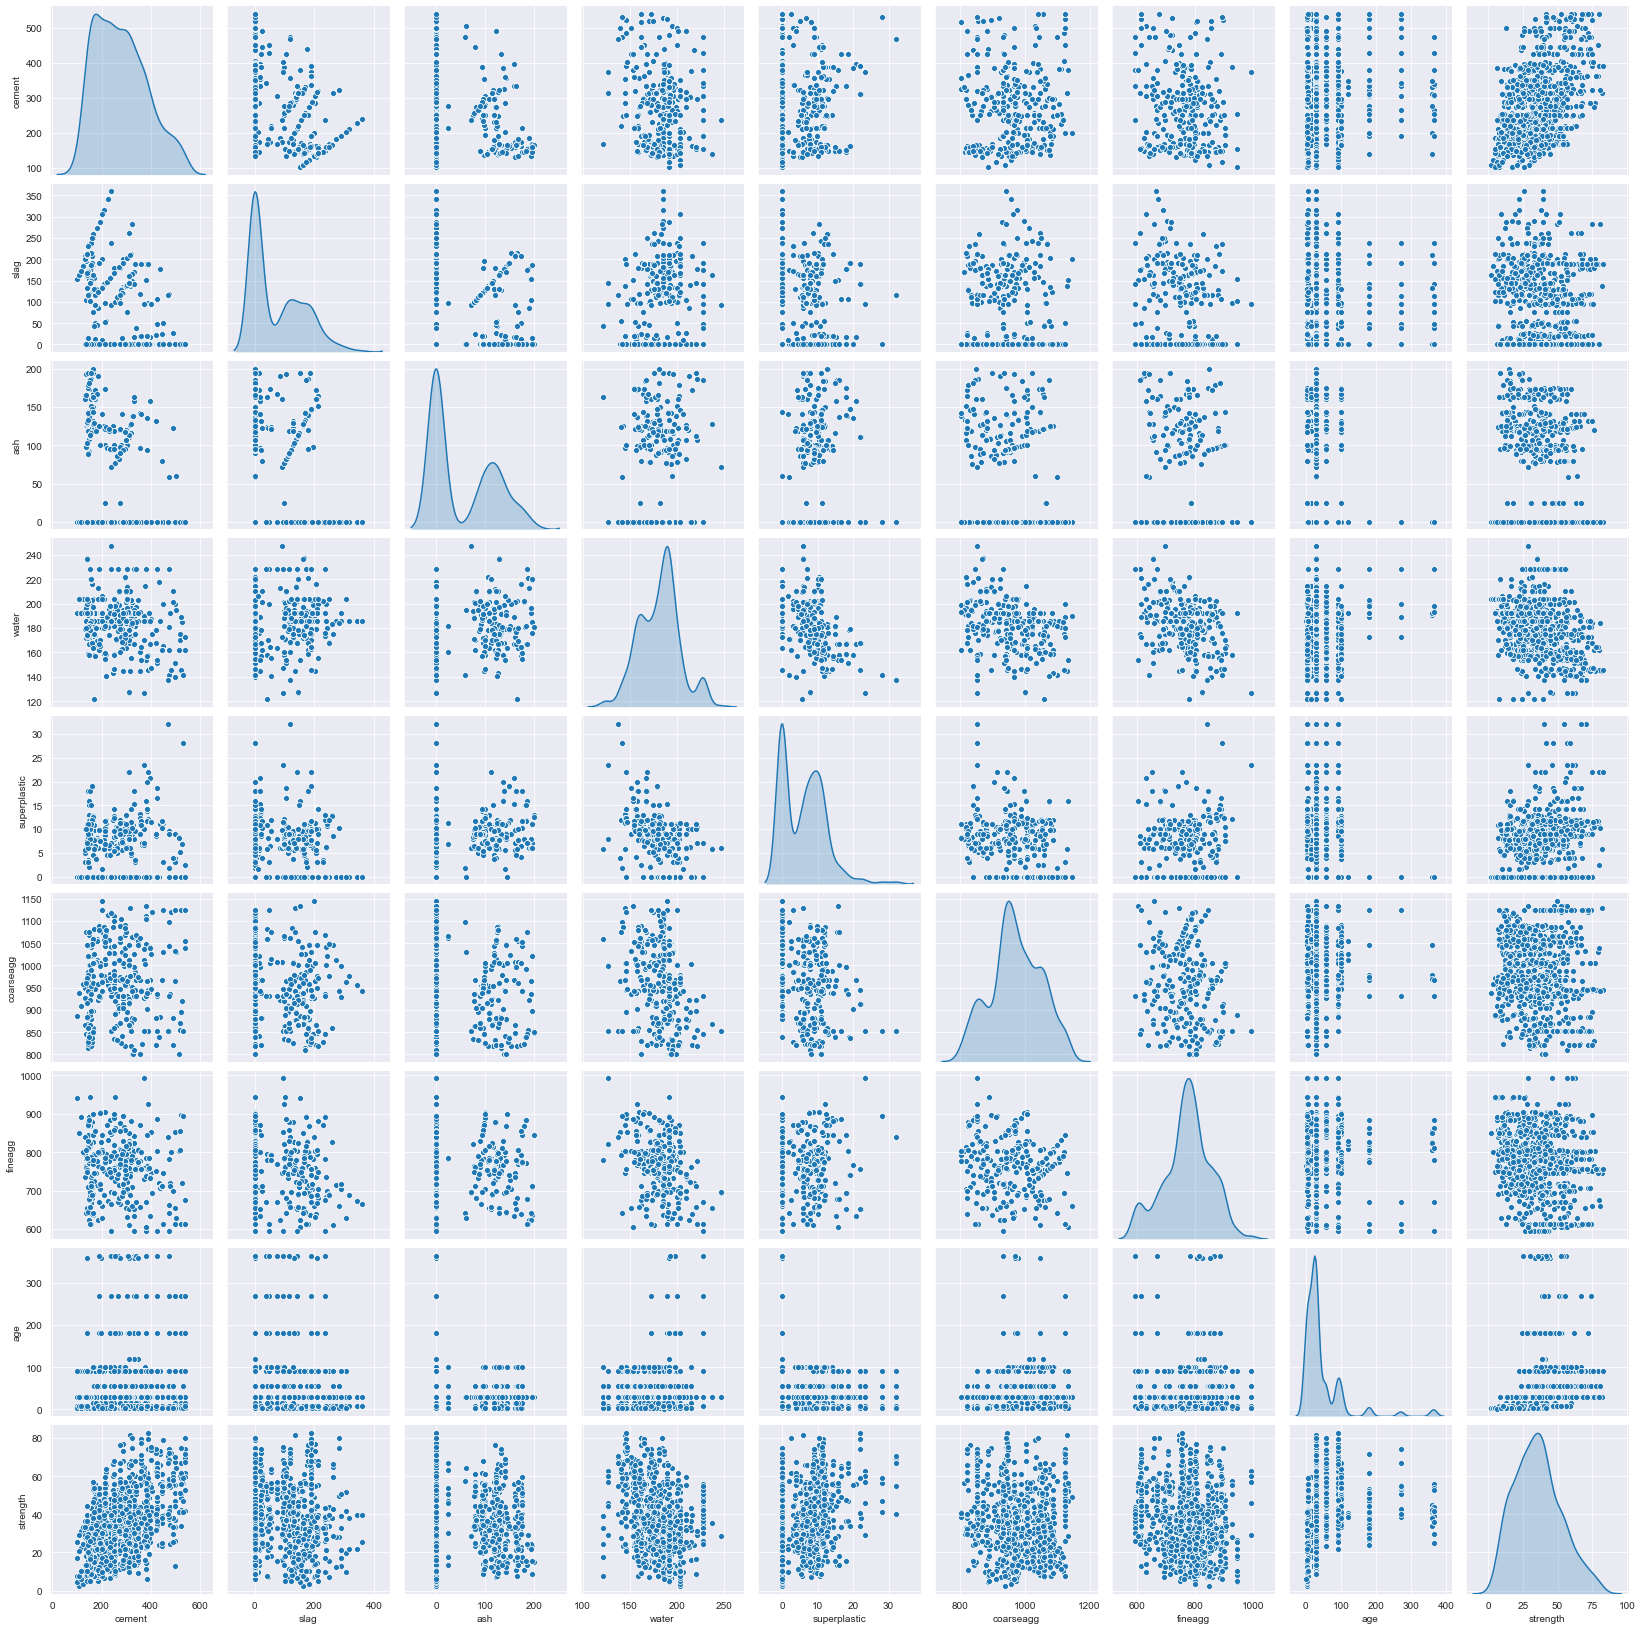

In [11]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Handling outliers
Here we will use IQR from box plots and zscores to replace outliers with the mean of the values so that we dont have dataloss


In [12]:
def IQR_outlier_removal(x):
    Q3 = x.quantile(0.75)
    Q1 = x.quantile(0.25)
    low_lim = Q1 - (Q3 - Q1)
    up_lim =  Q3 + (Q3 - Q1)
    return list( map( lambda x: x if(x < up_lim and x > low_lim) else np.nan, x.values) )
def zscore_outlier_removal(x, dev):
    temp_df = x[x.apply(zscore) < dev]
    temp_df = temp_df[x.apply(zscore) > -dev]
    return temp_df

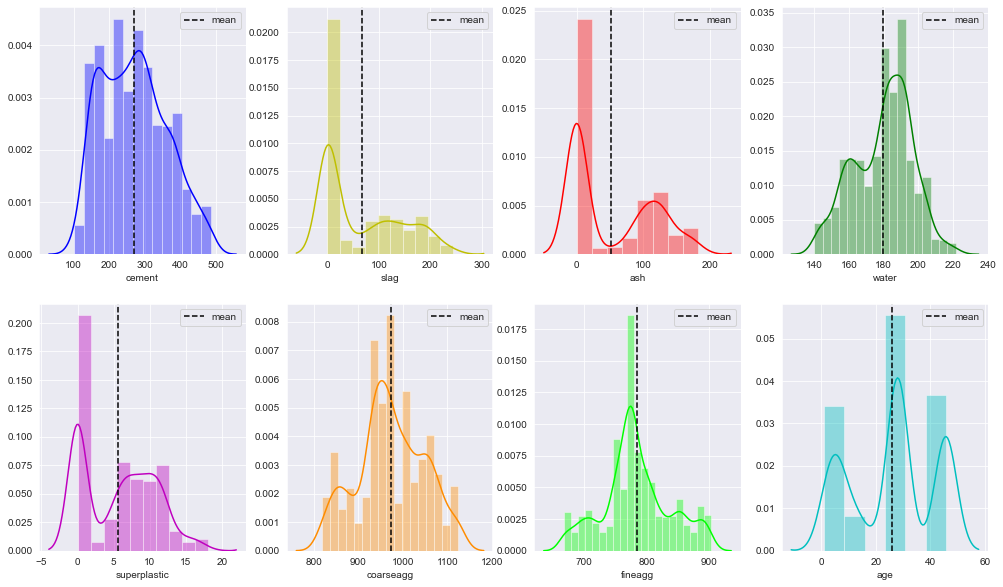

In [13]:
o_df = zscore_outlier_removal(df, 2)
o_df["fineagg"] = IQR_outlier_removal(o_df["fineagg"])
o_df["age"] = IQR_outlier_removal(o_df["age"])
o_df.fillna(df.mean(), inplace=True)
# Analyze the body of the distributions
cols = [i for i in df.columns if i not in 'strength']
fig = plt.figure(figsize=(17,10))
for i,j,k in itertools.zip_longest(cols, range(len(cols)), ["b","y","r","g","m","darkorange","lime","c"]):
    plt.subplot(2,4,j+1)
    ax = sns.distplot(o_df[i],color=k)
    plt.axvline(o_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")

Text(0.5, 1.0, 'Correlation between variables')

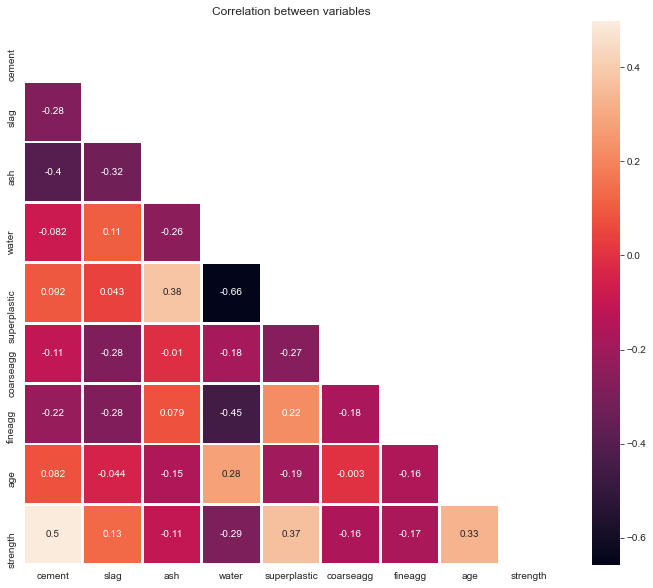

In [14]:
# Visualize the correlation matrix
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
with sns.axes_style("white"):
    sns.heatmap(corr,annot=True,linewidth=2, mask=mask)
plt.title("Correlation between variables")

### Observations
- cement vs strength shows the coefficient to be 0.5 and the water vs superplastic to be -0.66, the highest among all.

## Feature Engineering

1. Identify opportunities (if any) to create a composite feature, drop a feature.
2. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help
3. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [15]:
# calculate change in number of features
num_features = list()
for  degree in range(1,5):
   # Instantiate an poly object with 2nd degree
    poly = PolynomialFeatures(degree)
   # Fit and transform the X or input features
    df_poly = poly.fit_transform(o_df.drop('strength', axis=1))
    X = df_poly
    y = o_df[["strength"]]
    # split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
   # Fit the LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    # Calculate the score of Linear Regression
    print('\n Polynomial Degree', degree)
    print('Number of Features: %d' %  X.shape[1])
    print('Training score  :', round(lr.score(X_train, y_train)*100,2),'%')
    print('Testing score   :', round(lr.score(X_test, y_test)*100,2),'%')
    # Calculate RMSE
    print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))       



 Polynomial Degree 1
Number of Features: 9
Training score  : 60.52 %
Testing score   : 68.71 %
Root Mean Squared Error (RMSE): 8.965196745654145

 Polynomial Degree 2
Number of Features: 45
Training score  : 67.16 %
Testing score   : 73.93 %
Root Mean Squared Error (RMSE): 8.183980196544818

 Polynomial Degree 3
Number of Features: 165
Training score  : 83.7 %
Testing score   : 79.04 %
Root Mean Squared Error (RMSE): 7.337841966643543

 Polynomial Degree 4
Number of Features: 495
Training score  : 97.52 %
Testing score   : -553.52 %
Root Mean Squared Error (RMSE): 40.9740400617493


### Observations

Since we are not getting any satisfactory testing score on the dataset, we will not proceed with Polynomial feature.

## Feature Selection
Feature Selection is the technique of Feature engineering which analyzes the feature space to squeze out all the information to explain as much as variance it can there by getting rid of few unrelated dimensions.



### Principal Component Analysis
Principal component Analysis is a method to identify the patterns in data using their similarities and dissimilarities between the sample points. The patterns within data is hard to find especially when we cannot visualize it graphically. The principal component analysis is a powerful tool to explore data with its hidden patterns and reduce the dimensions.

#### Steps of Principal Component Analysis
1. Normalize all the data variables within same range of values (-1, 1)
2. Compute PCA is to calculate covariance matrix
3. Compute eigenvalues and corresponding eigenvectors
4. Arrange eigenvalues with corresponding eigenvectors in descending order. 

The higher value eigen vectors have more significance over the data and form principal components whereas the lower value eigen vectors can be removed in order to reduce the dimensions


In [16]:
# Copying all the predictor variables into X dataframe. Since 'class' is dependent variable drop it
X = o_df.drop(["strength"], axis=1) 

# Copy the 'status' column alone into the y dataframe. This is the dependent variable
y = o_df[["strength"]]

from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
# Covariance matrix
cov_matrix = np.cov(X_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00097182 -0.20130983 -0.36645614 -0.16061399  0.04079912 -0.19019813
  -0.06242145 -0.00294044]
 [-0.20130983  1.00097182 -0.2931413   0.06147529  0.06176743 -0.34931992
  -0.22572571  0.00970545]
 [-0.36645614 -0.2931413   1.00097182 -0.24884202  0.49446285  0.02836965
   0.04543971  0.03734324]
 [-0.16061399  0.06147529 -0.24884202  1.00097182 -0.59807399 -0.13276472
  -0.23380004 -0.02502453]
 [ 0.04079912  0.06176743  0.49446285 -0.59807399  1.00097182 -0.20216106
   0.13249551  0.04119551]
 [-0.19019813 -0.34931992  0.02836965 -0.13276472 -0.20216106  1.00097182
  -0.08282783 -0.04723936]
 [-0.06242145 -0.22572571  0.04543971 -0.23380004  0.13249551 -0.08282783
   1.00097182 -0.02133985]
 [-0.00294044  0.00970545  0.03734324 -0.02502453  0.04119551 -0.04723936
  -0.02133985  1.00097182]]


In [18]:
# Eigen values and vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.05643852 -0.48224579 -0.07352227 -0.24889601 -0.75796869  0.24170529
  -0.16980332  0.18742412]
 [ 0.19981531 -0.49600938 -0.01864527 -0.575204    0.39469137 -0.43661393
  -0.1642762  -0.09716778]
 [-0.50737527 -0.53916936  0.23657178  0.18791494  0.38347525  0.45781236
  -0.00639968  0.06246693]
 [ 0.53621888 -0.17495854 -0.58213098  0.11630256  0.242298    0.44882659
   0.25838701 -0.05038442]
 [-0.58113997  0.22090131 -0.68431182 -0.3283347   0.05364217  0.05329374
  -0.17577832  0.0278727 ]
 [-0.02393639 -0.29608743 -0.33937917  0.66009266 -0.03202555 -0.47146702
  -0.33086869  0.16756449]
 [-0.26724519 -0.25201679 -0.12488526  0.06674043 -0.23362539 -0.28561687
   0.69513272 -0.4750259 ]
 [-0.04702737 -0.01104502 -0.01862625 -0.10184567  0.07386922 -0.18223883
   0.50377946  0.833358  ]]

 Eigen Values 
%s [2.0152527  0.15777968 0.25236976 1.46123996 1.31266382 0.82823938
 0.97269485 1.00753439]


In [19]:
# Cumulative variance explained
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 25.16620181  43.41396779  59.80633514  72.38828762  84.53516872
  94.87810958  98.0296688  100.        ]


Text(0, 0.5, 'Eigen Values')

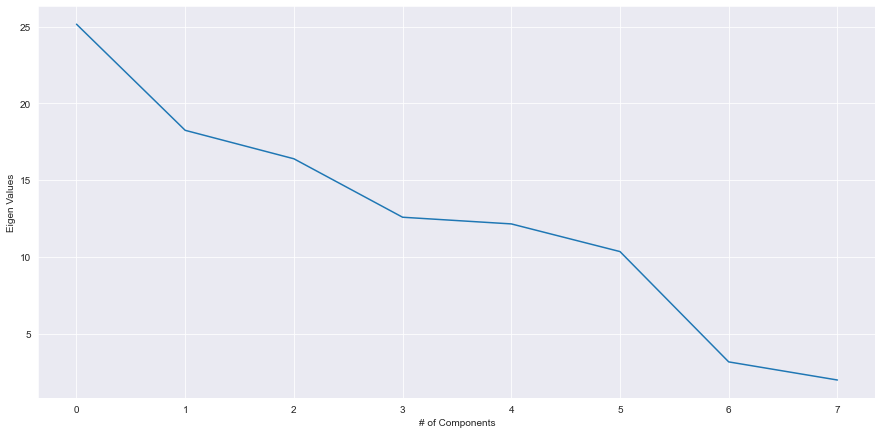

In [20]:
plt.figure(figsize = (15 , 7.2))
plt.plot(var_exp)
plt.xlabel('# of Components')
plt.ylabel('Eigen Values')

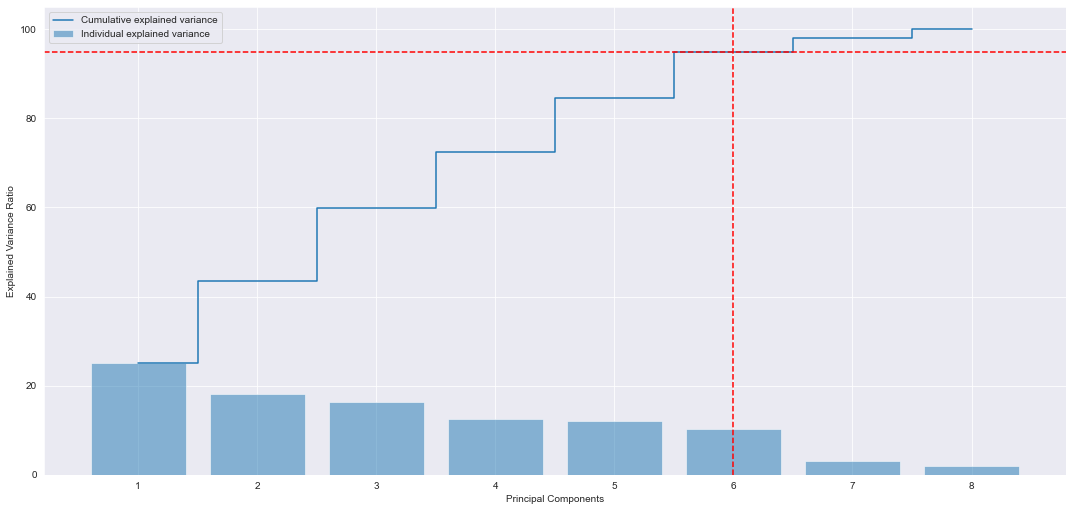

In [21]:
# Ploting 
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.axvline(x = 6, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Observations
Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
We will proceed with 6 components here which covers more than 95% of variance.

In [22]:
# Reducing the dimensions from 8 to 6
pca = PCA(n_components = 6, random_state = random_state)
pca.fit(X_scaled)
X_proj = pca.fit_transform(X_scaled)
display(X_proj.shape)
X = o_df.drop('strength', axis=1)
display(X.shape)

(1030, 6)

(1030, 8)

In [23]:
# Divide the original and the projected dataset into 80:20 ration for train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
X_proj_train, X_proj_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.2, random_state=1)

print('Original dimensions for train test split:\n', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('\nProjected dimensions for train test split:\n', X_proj_train.shape, X_proj_test.shape, y_train.shape, y_test.shape)

Original dimensions for train test split:
 (824, 8) (206, 8) (824, 1) (206, 1)

Projected dimensions for train test split:
 (824, 6) (206, 6) (824, 1) (206, 1)


# Linear Models
Linear models are the simplest parametric methods. A regression is a prediction where the target is continuous in nature.

We are going to utilize Standard Linear Regression and Regularized Linear Regression for both original and projected dataset to verify whether there are any linear relationship of the predictors with that of target variable stregth.

## Linear Regression (Original Features)

In [24]:
# Fit the LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# Print the coefficients of each attributes
lr.coef_

array([[ 5.89650859,  2.5351562 ,  0.90838615, -3.87937548,  0.46944942,
        -0.33902003, -0.96964837,  8.12382372]])

In [25]:
# Calculate the score of Linear Regression
print('Training score  :', lr.score(X_train, y_train))
print('Testing score   :', lr.score(X_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Training score  : 0.6051977987984105
Testing score   : 0.687132623946237
Root Mean Squared Error (RMSE): 8.965196745654142


Text(0, 0.5, 'values')

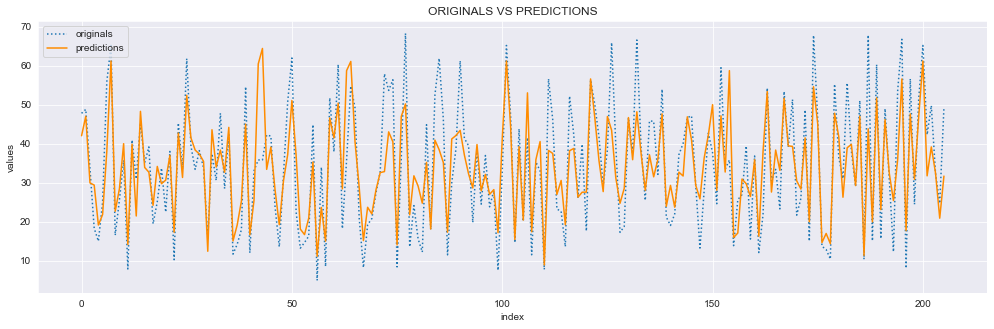

In [26]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.DataFrame(lr.predict(X_test)).T.squeeze().plot(label = "predictions",figsize=(17,5),color='darkorange')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

## Linear Regression (PCA Features)

In [27]:
# Fit the LinearRegression
lr = LinearRegression()
lr.fit(X_proj_train, y_train)
# Print the coefficients of each attributes
lr.coef_

array([[ 2.09475796,  4.44760192, -3.21525683, -8.26974347,  1.01218764,
        -2.03746384]])

In [28]:
# Calculate the score of Linear Regression
print('Training score  :', lr.score(X_proj_train, y_train))
print('Testing score   :', lr.score(X_proj_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, lr.predict(X_proj_test))))

Training score  : 0.5914111656139376
Testing score   : 0.6733937070017003
Root Mean Squared Error (RMSE): 9.159925871641775


Text(0, 0.5, 'values')

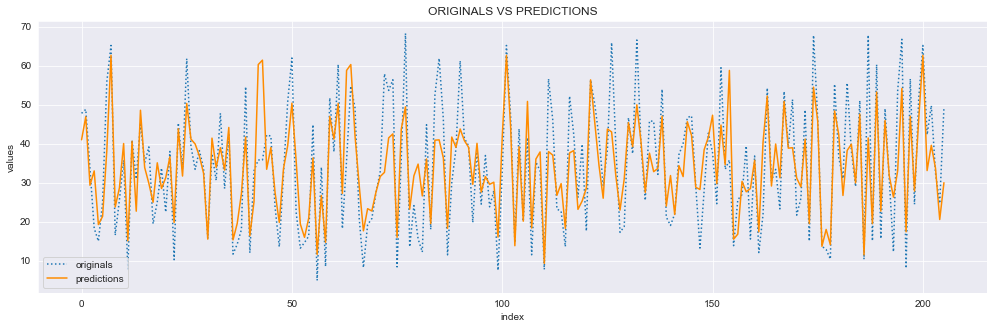

In [29]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.DataFrame(lr.predict(X_proj_test)).T.squeeze().plot(label = "predictions",figsize=(17,5),color='darkorange')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

### Observations

Both linear regression (original and with pca) doesn't seem to capture the regression well. Let's apply regularisation technique to see how the performance gets affected.

## Regularised Linear Model
Linear models are being parametrc model contribute to more towards Bias Error. Regularizarion is needed inorder to decrease the bias error so we can find a sweet spot where the performance of our model stands promising for unseen data. 2 such regularized linear models are:

1. **Ridge Regression** imposes an additional shrinkage penalty to the ordinary least squares cost fucntion to limit its squared $L_2$ norm.
Lasso
2.  **Lasso Regression** imposes a penalty on the $L_1$ norm to determine a potentially higher number of null coefficients.


### Ridge Regression (Original Dataset)

In [30]:
# Fit the Ridge regularised linear model
rg = Ridge(alpha=0.1)
rg.fit(X_train, y_train)
# Print the coefficients of each attributes
rg.coef_

array([[ 5.89483995,  2.53371612,  0.90688924, -3.87904172,  0.47041005,
        -0.33957813, -0.9700067 ,  8.12280884]])

In [31]:
# Calculate the score of Linear Regression
print('Training score  :', rg.score(X_train, y_train))
print('Testing score   :', rg.score(X_test, y_test))

# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rg.predict(X_test))))

Training score  : 0.6051977850592072
Testing score   : 0.6871177964906495
Root Mean Squared Error (RMSE): 8.965409183082613


Text(0, 0.5, 'values')

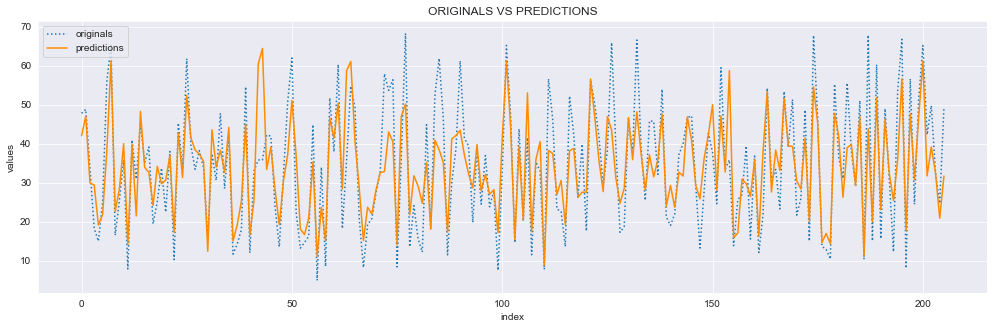

In [32]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.DataFrame(rg.predict(X_test)).T.squeeze().plot(label = "predictions",figsize=(17,5),color='darkorange')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

### Ridge Regression (PCA projected Dataset)

In [33]:
# Fit the Ridge regularised linear model
rg_proj = Ridge(alpha=0.1)
rg_proj.fit(X_proj_train, y_train)
# Print the coefficients of each attributes
rg_proj.coef_

array([[ 2.09460245,  4.44723016, -3.21496197, -8.26873506,  1.0120689 ,
        -2.03716486]])

In [34]:
# Calculate the score of Linear Regression
print('Training score  :', rg_proj.score(X_proj_train, y_train))
print('Testing score   :', rg_proj.score(X_proj_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rg_proj.predict(X_proj_test))))

Training score  : 0.591411158569037
Testing score   : 0.6733801644935125
Root Mean Squared Error (RMSE): 9.160115774726785


Text(0, 0.5, 'values')

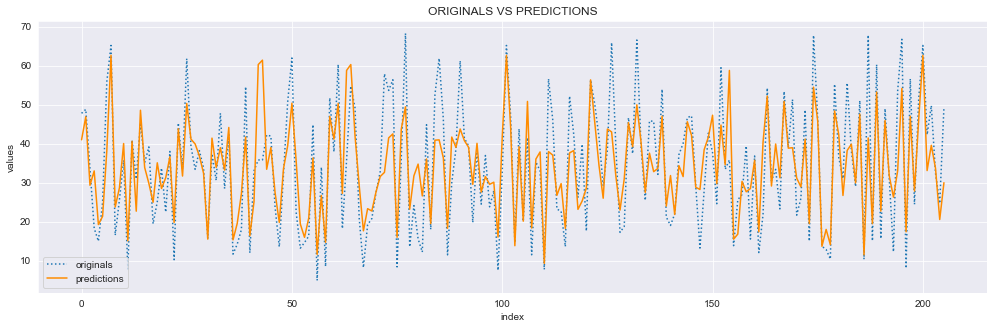

In [35]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.DataFrame(rg_proj.predict(X_proj_test)).T.squeeze().plot(label = "predictions",figsize=(17,5),color='darkorange')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

### Lasso Regression (Original Dataset)

In [36]:
# Fit the Lasso regularised linear model
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)
# Print the coefficients of each attributes
ls.coef_

array([ 5.65953417,  2.30935671,  0.62026634, -3.79214827,  0.5833225 ,
       -0.31895843, -0.91871275,  8.02840968])

In [37]:
# Calculate the score of Linear Regression
print('Training score  :', ls.score(X_train, y_train))
print('Testing score   :', ls.score(X_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, ls.predict(X_test))))

Training score  : 0.6047679243256912
Testing score   : 0.6810828947945556
Root Mean Squared Error (RMSE): 9.051459062737587


Text(0, 0.5, 'values')

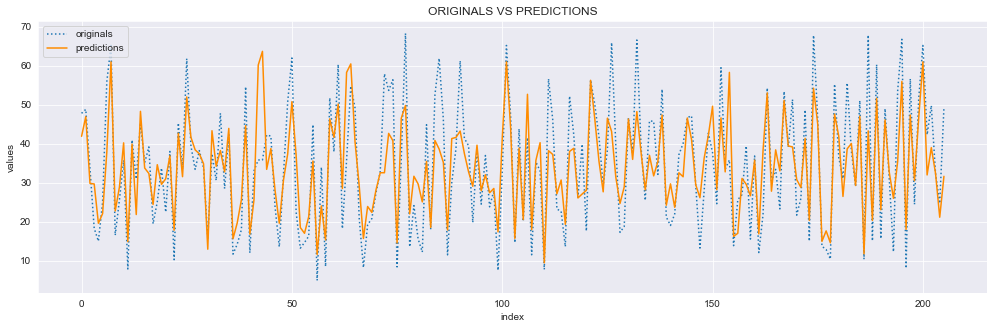

In [38]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax =  pd.DataFrame(ls.predict(X_test)).T.squeeze().plot(label = "predictions",figsize=(17,5),color='darkorange')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

### Lasso Regression (PCA projected Dataset)

In [39]:
# Fit the Lasso regularised linear model
ls_proj = Lasso(alpha=0.1)
ls_proj.fit(X_proj_train, y_train)
# Print the coefficients of each attributes
ls_proj.coef_

array([ 2.03857494,  4.37736953, -3.13748244, -8.16957231,  0.91116107,
       -1.91868672])

In [40]:
# Calculate the score of Linear Regression
print('Training score  :', ls_proj.score(X_proj_train, y_train))
print('Testing score   :', ls_proj.score(X_proj_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, ls_proj.predict(X_proj_test))))

Training score  : 0.5911574846387817
Testing score   : 0.6719246889085893
Root Mean Squared Error (RMSE): 9.180502633731109


Text(0, 0.5, 'values')

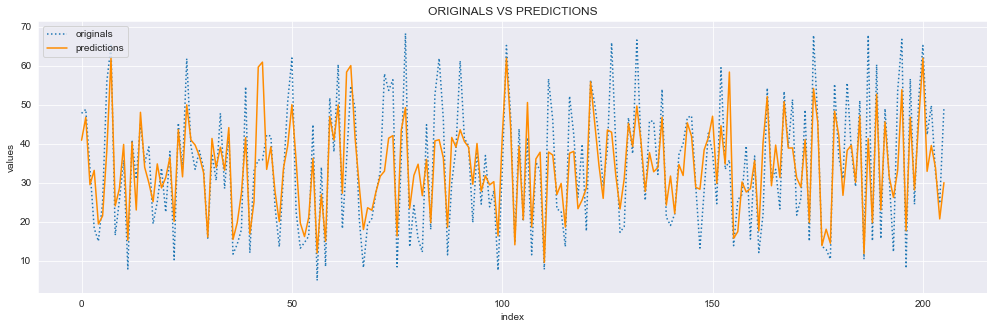

In [41]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.DataFrame(ls_proj.predict(X_proj_test)).T.squeeze().plot(label = "predictions",figsize=(17,5),color='darkorange')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

### Observations

Since both Ridge and Lasso regression failed to give satisfactory results, we should be approaching non-parametric test for better model. We have noticed few of the features in the dataset posses a distribution with mix of multiple gaussians in the bi-variate analysis section. Let's apply clustering technique to find if there are any distiguished clusters and their suitability in compressive strength prediction.

## K-Means Clustering

K-Means clustering is one of the simplest and popular unsupervised machine learning algorithm for clustering. It identifies k number of centroids, and then allocates every data point to their nearest cluster, while keeping the centroids as small as possible. The algorithm works as follows:

1. Initialize Means - First initialize k data points randomly called means
2. Euclidean DIstance - Categorize each item to its closest mean and update the mean's coordinates, which are the averages of the items categorized in that mean so far.
3. Update Mean - Repeat the process for a given number of iterations to find the best optimized clusters.

### Optimized Intertia - Elbow Analysis
The technique used to find out the optimized k value. There are 2 gaussians present in each of the 3 features (slag, ash and superplastic) is what we observed in the pairplot. Hence we will analyze more the data for more than 6, let's take 14 clusters.

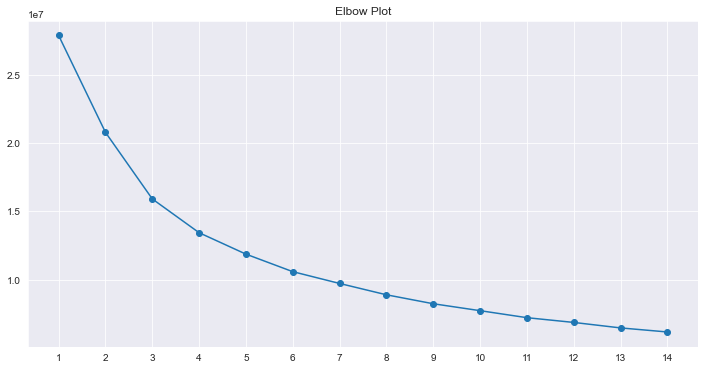

In [42]:
k_range = range(1,15)
kmeans = [KMeans(n_clusters=n) for n in k_range]
sse = [kmeans[i].fit(o_df).inertia_ for i in range(len(kmeans))]
plt.figure(figsize=(12,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Plot')
_ = plt.xticks(k_range)

Text(0, 0.5, 'Bin Counts')

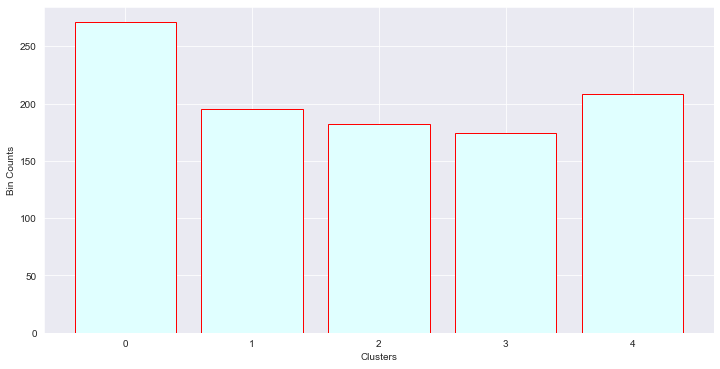

In [43]:
# Initialize 5 centroid clusters and fit the dataset
kmeans = KMeans(n_clusters= 5, random_state=1)
kmeans.fit(o_df)

# Find out the count of observations in each clusters
labels = kmeans.labels_
plt.figure(figsize=(12,6))
plt.bar(np.unique(labels), np.bincount(labels), color='lightcyan', edgecolor='red')
plt.xlabel('Clusters')
plt.ylabel('Bin Counts')

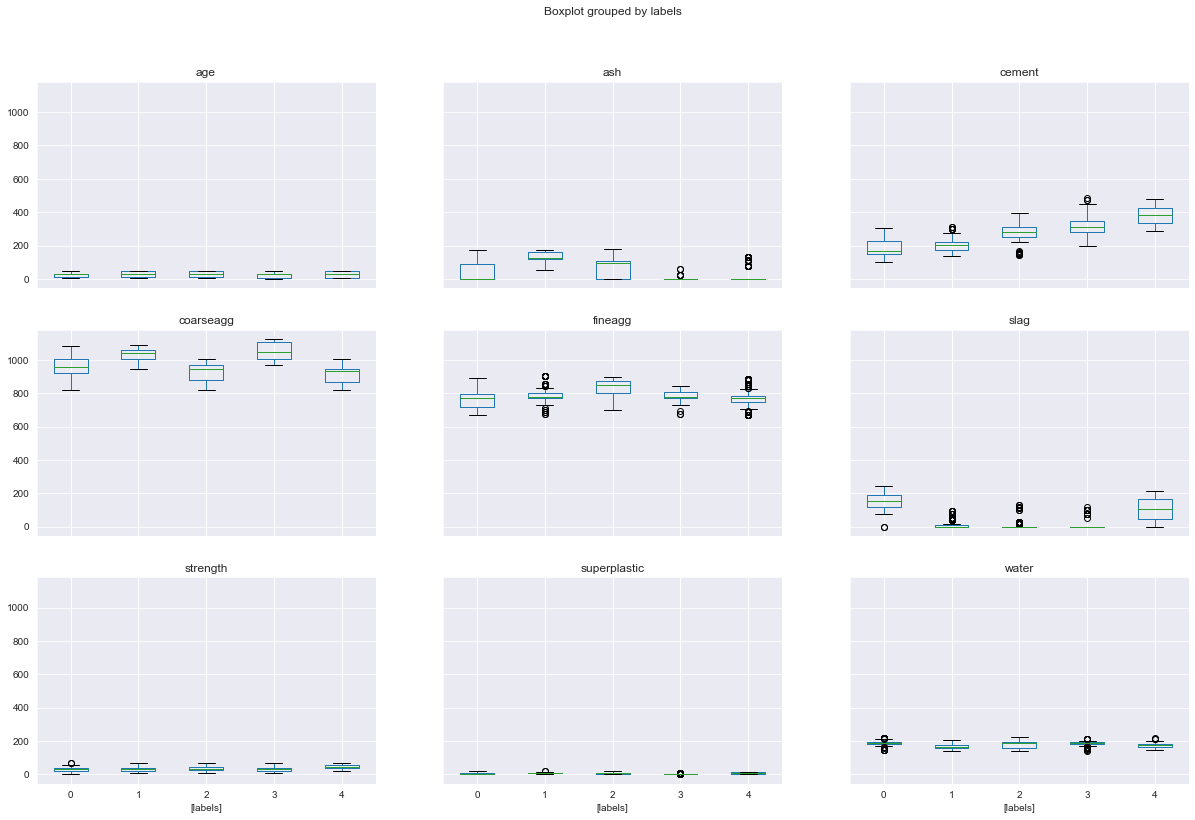

In [44]:
## Creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(labels , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
# Join the labels with original dataset 
df_labeled = o_df.join(cluster_labels)
_ = df_labeled.boxplot(by='labels', layout=(3,3), figsize=(20,13))

### Observations:

No distinct clusters are visible at any feature space. Looks like the attributes are weak predictors except for cement.
The potential of getting better results by breaking data into clusters is unlikely to give the desired result. Hence we will discard the clustering approach and proceed with non-parametric models.
Obtain feature importance for the individual features using multiple methods and present your findings.

We will analyze the following non-parametric models and check the accuracy scores with each one of them.

1. Support Vector Regressor
2. Decision Tree Regressor

From Ensemble family:

1. Random Forest Regressor
2. Bagging Regressor
3. Gradient Boosting Regressor

## Support Vector Regressor

### Linear Kernel

In [45]:
svr = SVR(C=1, kernel='linear')
svr.fit(X_train, y_train)
# Calculate the score of Support Vector Regressor
print('Training score  :', svr.score(X_train, y_train))
print('Testing score   :', svr.score(X_test, y_test))

Training score  : 0.5898086982124007
Testing score   : 0.7013854578779646


Text(0, 0.5, 'values')

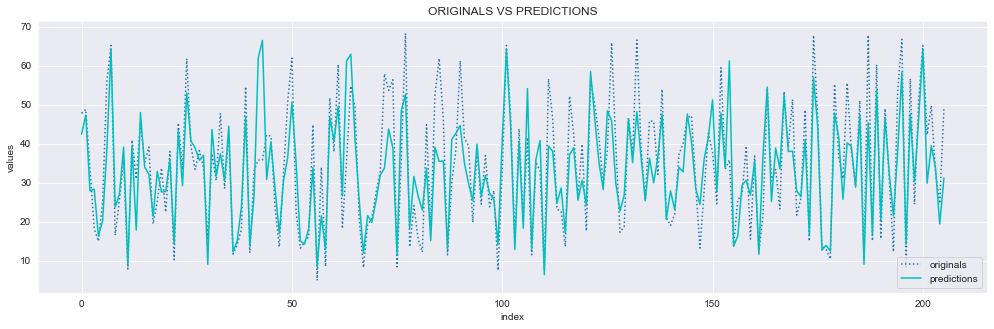

In [46]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(svr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='c')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

### RBF kernel

In [47]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
# Calculate the score of Support Vector Regressor
print('Training score  :', svr.score(X_train, y_train))
print('Testing score   :', svr.score(X_test, y_test))

Training score  : 0.6220412258127386
Testing score   : 0.6802491493511088


Text(0, 0.5, 'values')

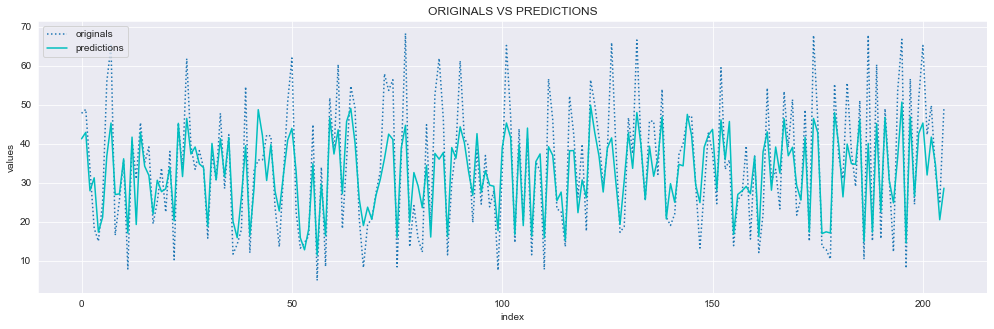

In [48]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(svr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='c')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

### Polynomial Kernel

In [49]:
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
# Calculate the score of Support Vector Regressor
print('Training score  :', svr.score(X_train, y_train))
print('Testing score   :', svr.score(X_test, y_test))

Training score  : 0.6220587277955804
Testing score   : 0.6374797731183905


Text(0, 0.5, 'values')

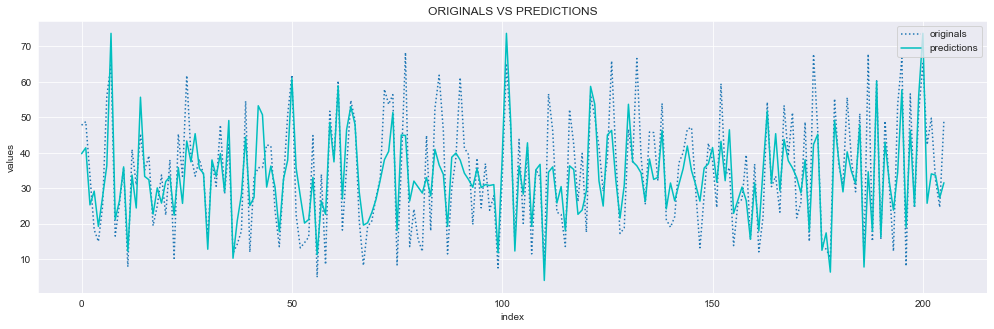

In [50]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(svr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='c')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

In [51]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
# Calculate the score of Decision Tree Regressor
print('Training score  :', dtr.score(X_train, y_train))
print('Testing score   :', dtr.score(X_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, dtr.predict(X_test))))

Training score  : 0.9896844212134502
Testing score   : 0.7940103291809621
Root Mean Squared Error (RMSE): 7.274487578957086


## Regularized Decision Tree

In [52]:
dtr = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=40, min_samples_leaf=9)
dtr.fit(X_train, y_train)
# Calculate the score of Decision Tree Regressor
print('Training score  :', dtr.score(X_train, y_train))
print('Testing score   :', dtr.score(X_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, dtr.predict(X_test))))

Training score  : 0.746407582388185
Testing score   : 0.7097690589194223
Root Mean Squared Error (RMSE): 8.634785228338512


Text(0, 0.5, 'values')

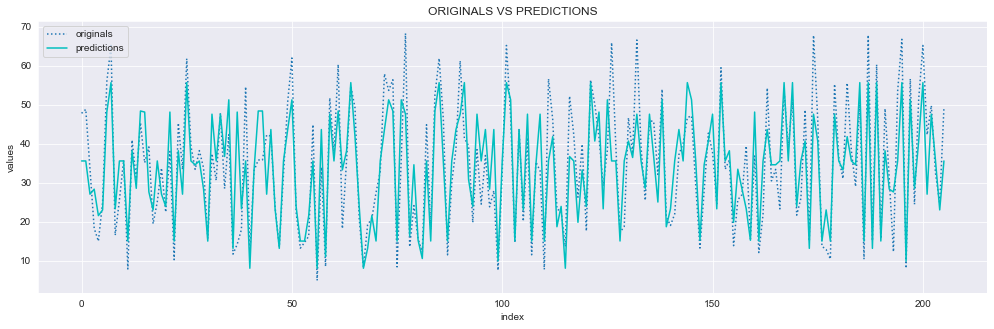

In [53]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(dtr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='c')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

## Ensemble Techniques
Ensemble is the art of combining diverse set of learners (individual models) together to improvise on the stability and predictive power of the model.

Advantages of ensemble methods:

1. Intuitively, ensembles allow the different needs of a difficult problem to be handled by hypotheses suited to those particular needs.
2. Mathematically, ensembles provide an extra degree of freedom in the classical bias/variance tradeoff, allowing solutions that would be difficult (if not impossible) to reach with only a single hypothesis.
3. They’re unlikely to overfit.

### Bagging
Bagging or Bootstrap Aggregating is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions. Decision Tree is used as the default base estimator unless specified otherwise. Following are the steps for the bagging meta-estimator algorithm:

1. Random subsets are created from the original dataset (Bootstrapping).
2. The subset of the dataset includes all features.
3. A user-specified base estimator is fitted on each of these smaller sets.
4. Predictions from each model are combined to get the final result.

In [54]:
bag = BaggingRegressor()
bag.fit(X_train, y_train)

BaggingRegressor()

In [55]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', bag.score(X_train, y_train))
print('Testing score   :', bag.score(X_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, bag.predict(X_test))))

Training score  : 0.9566133275252284
Testing score   : 0.8713697385368935
Root Mean Squared Error (RMSE): 5.74845665605143


Text(0, 0.5, 'values')

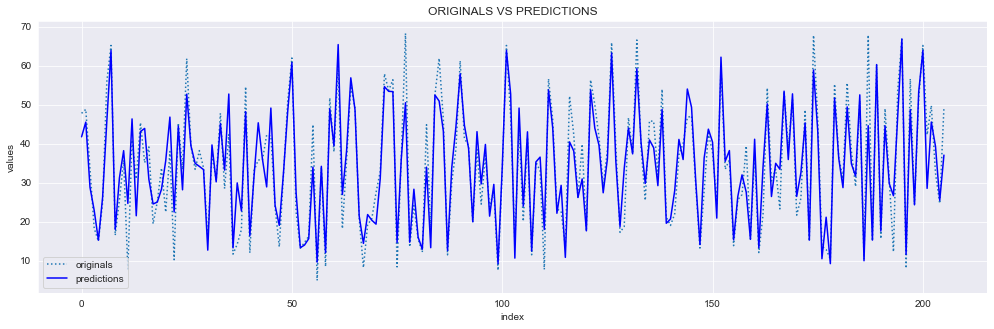

In [56]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(bag.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='b')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

### Bagging with SVR as base estimator

In [57]:
bag_svr = BaggingRegressor(base_estimator=SVR())
bag_svr.fit(X_train, y_train)
# Calculate the score of Decision Tree Regressor
print('Training score  :', bag_svr.score(X_train, y_train))
print('Testing score   :', bag_svr.score(X_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, bag_svr.predict(X_test))))

Training score  : 0.6139701381248887
Testing score   : 0.6707357186792982
Root Mean Squared Error (RMSE): 9.19712301374757


## Random Forest Regressor
Random Forest is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.
Following are the steps of the Random Forest algorithm:

1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

In [58]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
# Calculate the score of Decision Tree Regressor
print('Training score  :', rfr.score(X_train, y_train))
print('Testing score   :', rfr.score(X_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rfr.predict(X_test))))

Training score  : 0.9674671721363344
Testing score   : 0.8741386588589201
Root Mean Squared Error (RMSE): 5.686248855831322


Text(0, 0.5, 'values')

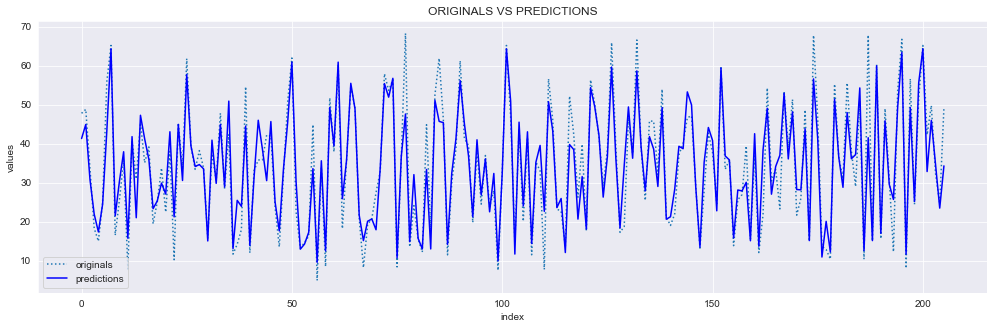

In [59]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(rfr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='blue')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

## Gradient Boosting Regressor (GBM)
Gradient Boosting is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

In [60]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
# Calculate the score of Decision Tree Regressor
print('Training score  :', gbm.score(X_train, y_train))
print('Testing score   :', gbm.score(X_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm.predict(X_test))))

Training score  : 0.878283621163479
Testing score   : 0.8175987123801429
Root Mean Squared Error (RMSE): 6.8453181046920735


Text(0, 0.5, 'values')

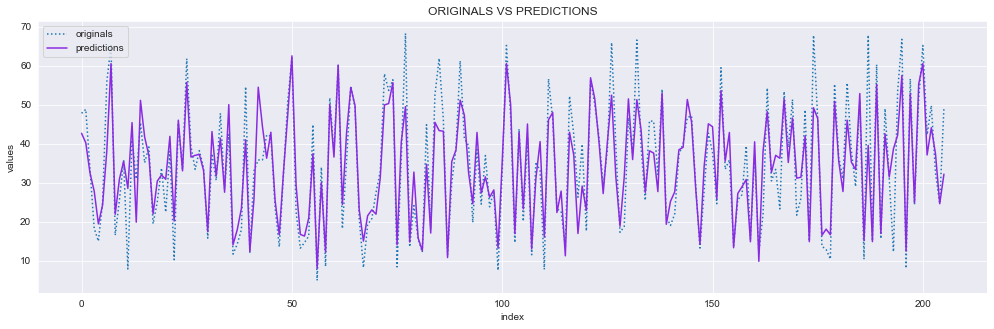

In [61]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(gbm.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='blueviolet')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

## Hyperparameter Tuning 

1. Algorithms that you think will be suitable for this project
2. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit
3. Model performance range at 95% confidence level

Random Forest Regressor is coming out to be best performing algorithm among all.So we chose this algorithm to proceed further with Model Tuning.

### Hyperparameter Tuning - GridSearchCV
Let's perform the grid search using scikit-learn’s GridSearchCV which stands for grid search cross validation. By default, the GridSearchCV’s cross validation uses 3-fold KFold or StratifiedKFold depending on the situation.

In [62]:
# Run GridSearch to tune the hyper-parameter
st = time()
k_fold_cv = 5 # Stratified 10-fold cross validation
grid_params = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
          }
grid = GridSearchCV(rfr, param_grid=grid_params, cv=k_fold_cv, 
                    n_jobs = 1, verbose = 0, return_train_score=True)
grid.fit(X_train, y_train)
print('Best hyper parameter:', grid.best_params_)
print('Time taken %.2fs to tune the best hyper-parameter for Gradient Boosting Regressor' % (time()-st))

Best hyper parameter: {'bootstrap': True, 'max_features': 'log2', 'n_estimators': 100}
Time taken 10.27s to tune the best hyper-parameter for Gradient Boosting Regressor


In [63]:
# Use the tuned estimator from GridSearch to run the model
rfr_grid = grid.best_estimator_
rfr_grid.fit(X_train, y_train)

RandomForestRegressor(max_features='log2')

In [64]:
# Calculate the score of Tuned Gradient Boosting Regressor
print('Training score  :', rfr_grid.score(X_train, y_train))
print('Testing score   :', rfr_grid.score(X_test, y_test))
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rfr_grid.predict(X_test))))

Training score  : 0.9694364453112179
Testing score   : 0.8674936378564215
Root Mean Squared Error (RMSE): 5.834424850477008


### Hyperparameter Tuning - RandomizedSearchCV

In [65]:
# Run RandomizedSearchCV to tune the hyper-parameter
st = time()
k_fold_cv = 5 # Stratified 10-fold cross validation
params = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
    }
random = RandomizedSearchCV(rfr, param_distributions=params, cv=k_fold_cv,
                         n_iter = 5, scoring='neg_mean_absolute_error',verbose=2, random_state=42,
                          n_jobs=-1, return_train_score=True)
random.fit(X_train, y_train)
print('Best hyper parameter:', random.best_params_)
print('Time taken %.2fs to tune the best hyper-parameter for Gradient Boosting Regressor by Random Search.' % (time()-st))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    2.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished


Best hyper parameter: {'n_estimators': 100, 'max_features': 'log2', 'bootstrap': True}
Time taken 2.86s to tune the best hyper-parameter for Gradient Boosting Regressor by Random Search.


In [66]:
# Use the tuned estimator from GridSearch to run the model
rfr_random = random.best_estimator_
rfr_random.fit(X_train, y_train)

RandomForestRegressor(max_features='log2')

In [67]:
# Calculate the score of Tuned Gradient Boosting Regressor
print('Training score  :', rfr_random.score(X_train, y_train))
print('Testing score   :', rfr_random.score(X_test, y_test))

Training score  : 0.9694456020255134
Testing score   : 0.8711853458571668


### Observation

Even though  both hyperparameter tuning methods looks good, GridSearchCV looks like a better model to go forward with.

Text(0, 0.5, 'values')

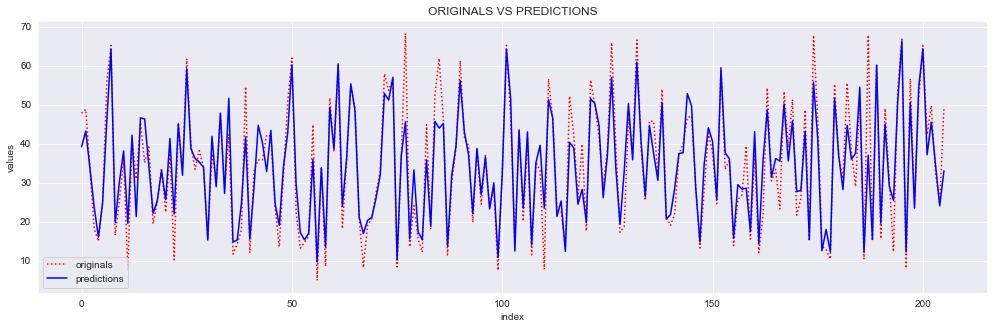

In [68]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':',color='r')
ax = pd.Series(rfr_grid.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='blue')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

## Bootstrap Sampling
The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.

It can be used to estimate summary statistics such as the mean or standard deviation. It is used in applied machine learning to estimate the skill of machine learning models when making predictions on data not included in the training data.

A desirable property of the results from estimating machine learning model skill is that the estimated skill can be presented with confidence intervals, a feature not readily available with other methods such as cross-validation.

In [70]:
# Bootstrap Sampling
st = time()
values = o_df.drop('ash', axis=1).values
n_iterations = 100        # Number of bootstrap samples to create
n_size = int(len(o_df))    # size of a bootstrap sample
# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    # picking rest of the data not considered in sample
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    
    # fit model
    rfr_boot = grid.best_estimator_
    rfr_boot.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
    predictions = rfr_boot.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = rfr_boot.score(test[:, :-1] , y_test)
    stats.append(score)
print('Time taken %.2fs for resampling' % (time()-st))


Time taken 46.10s for resampling


With 95.0 confidence interval, Random Forest's score varies between 77.1% and 85.7%


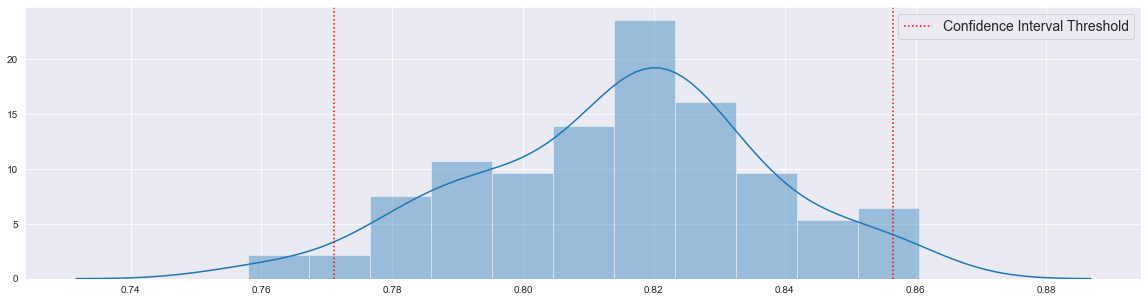

In [71]:
# Plot confidence Interval
plt.figure(figsize=(20,5))
# plt.hist(stats)
sns.distplot(stats, bins=11)
alpha = 0.95                             # for 95% confidence interval
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
plt.axvline(x=lower, color='r', linestyle=':')
plt.axvline(x=upper, color='r', linestyle=':', label='Confidence Interval Threshold')
plt.legend(loc="best",prop={"size":14})
print("With %.1f confidence interval, Random Forest's score varies between %.1f%% and %.1f%%" % 
      (alpha*100, lower*100, upper*100))

# Conclusion
Summing up all the observations, it is evident that:

- Compressive Strength of concrete is a highly nonlinear function of age and ingredients.
- Random Forest ensemble technique stood pretty well in predicting the compressive strength of concrete given its listed ingredients.
- The model that is fined tuned with hyperparameter tuning, is able to predict with 76.9% to 87.0% accuracy with 95% confidence level.